In [99]:
pip install fuzzy

In [100]:
import fuzzy 

In [101]:
import pandas as pd

# Reading in dataset
author_df=pd.read_csv("https://raw.githubusercontent.com/smridhiwho/Gender-Predicition/main/nytkids_yearly.csv", delimiter=';')

# Looping through author_df['Author'] to extract the authors first names
first_name = []
for name in author_df["Author"]:
    first_name.append(name.split()[0])

# Adding first_name as a column to author_df
author_df["first_name"]=first_name
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


In [102]:
import numpy as np
# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []

for name in author_df['first_name']:
    nysiis_name.append(fuzzy.nysiis(name))

author_df['nysiis_name'] = nysiis_name

In [103]:
author_df.head(10)

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR
5,2017,SHE PERSISTED,Chelsea Clinton,26,Chelsea,CALS
6,2017,THE BOOK WITH NO PICTURES,Benjamin J. Novak,24,Benjamin,BANJANAN
7,2017,WHAT DO YOU DO WITH AN IDEA?,Kobi Yamada,21,Kobi,CAB
8,2017,DRAGONS LOVE TACOS 2,Adam Rubin and Daniel Salmieri,17,Adam,ADAN
9,2017,WE'RE ALL WONDERS,R. J. Palacio,16,R.,R


In [104]:
namenp=np.unique(author_df["first_name"])
namenp

array(['Aaron', 'Adam', 'Ahmet', 'Ainsley', 'Al', 'Ame', 'Amy', 'Andrea',
       'Anna', 'Antoine', 'Barack', 'Barb', 'Barbara', 'Beatrix',
       'Benjamin', 'Berkeley', 'Beryl', 'Beth', 'Bill', 'Bonny', 'Brad',
       'Brandon', 'Brendan', 'Brian', 'Buzz', 'Callista', 'Carl',
       'Carmen', 'Caroline', 'Carson', 'Cathy', 'Charlie', 'Chelsea',
       'Chris', 'Christopher', 'Clement', 'Cokie', 'Cynthia', 'Dan',
       'Danica', 'David', 'Debbie', 'Deborah', 'Doreen', 'Drew', 'Ed',
       'Elise', 'Eliza', 'Elle', 'Emily', 'Emma', 'Eric', 'Ferdinand',
       'Gary', 'Glenn', 'Graeme', 'Greg', 'Herman', 'Herve', 'Hillary',
       'Holly', 'Ian', 'Jacky', 'James', 'Jamie', 'Jan', 'Jane', 'Javaka',
       'Jean', 'Jeff', 'Jennifer', 'Jenny', 'Jerry', 'Jimmy', 'Jo',
       'Joan', 'John', 'Jon', 'Jonah', 'Joyce', 'Judy', 'Julia', 'Julian',
       'Julianne', 'Julie', 'Kabir', 'Kareem', 'Karma', 'Kate',
       'Katherine', 'Kathie', 'Keith', 'Kelly', 'Kevin', 'Kimberly',
       'Kobi', 'K

In [105]:
fuzzynp=np.unique(author_df["nysiis_name"])
fuzzynp

array(['ADAN', 'AHNAT', 'AL', 'AN', 'ANDR', 'ANSLY', 'ANTAN', 'ANY',
       'ARAN', 'B', 'BAL', 'BANJANAN', 'BANY', 'BARAC', 'BARAL', 'BARB',
       'BARBAR', 'BARCALY', 'BATH', 'BATRAC', 'BRAD', 'BRAN', 'BRANDAN',
       'CAB', 'CABAR', 'CACY', 'CAFAN', 'CALAST', 'CALS', 'CALY',
       'CANBARLY', 'CANT', 'CARALAN', 'CARAN', 'CARL', 'CARLY', 'CARN',
       'CARNAN', 'CARSAN', 'CAT', 'CATARAN', 'CATH', 'CATHY', 'CHR',
       'CHRASTAFAR', 'CLANAD', 'CRAST', 'DABAR', 'DABY', 'DAN', 'DANAC',
       'DARAN', 'DAVAD', 'DR', 'ED', 'EL', 'ELAS', 'EN', 'ENALY', 'ERAC',
       'FALAP', 'FARAL', 'FARDANAD', 'GARY', 'GLAN', 'GRAG', 'GRAN',
       'HALARY', 'HALY', 'HARNAN', 'HARV', 'IAN', 'ILASTRATAD', 'J',
       'JACY', 'JADY', 'JAF', 'JAL', 'JALAN', 'JALY', 'JAN', 'JANAFAR',
       'JANY', 'JARY', 'JAVAC', 'JYC', 'L', 'LABAN', 'LACY', 'LAN',
       'LANANY', 'LANDSY', 'LAR', 'LARAN', 'LARY', 'LAS', 'M', 'MAC',
       'MACAL', 'MALAL', 'MAN', 'MARAC', 'MARAN', 'MARC', 'MARGARAT',
       'MARY'

In [106]:
# Printing out the difference between unique firstnames and unique nysiis_names:
print(len(namenp)-len(fuzzynp))

25


In [107]:
import pandas as pd
# Reading in dataset
babies_df = pd.read_csv('https://raw.githubusercontent.com/smridhiwho/Gender-Predicition/main/babynames_nysiis.csv', delimiter = ';')
babies_df.head()

,babynysiis,perc_female,perc_male
0,NaN,62.50,37.50
1,RAX,63.64,36.36
2,ESAR,44.44,55.56
3,DJANG,0.00,100.00
4,PARCAL,25.00,75.00


In [108]:
# Looping through babies_df to and filling up gender
gender = []
for idx, row in babies_df.iterrows():
    if row[1] > row[2]:
        gender.append('F')
    elif row[1] < row[2]:
        gender.append('M')
    elif row[1] == row[2]:
        gender.append('N')
    else:
        gender
    
# Adding a gender column to babies_df
babies_df['gender'] = gender

babies_df.head()

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


In [109]:
# Creating a function that returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []

for idx in author_df['nysiis_name']:
    index = locate_in_list(list(babies_df['babynysiis']), idx)
    if index < 0:
        author_gender.append('Unknown')
    else:
        author_gender.append(list(babies_df['gender'])[index])
        
# Adding author_gender to the author_df
author_df['author_gender'] = author_gender
# Counting the author's genders
author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

In [110]:
# Creating a list of unique years, sorted in ascending order.
years = np.unique(author_df['Year'])

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

In [111]:
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [112]:
author_df.head(10)

,Year,Book Title,Author,Besteller this year,first_name,nysiis_name,author_gender
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN,M
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY,F
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR,M
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR,M
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR,M
5,2017,SHE PERSISTED,Chelsea Clinton,26,Chelsea,CALS,F
6,2017,THE BOOK WITH NO PICTURES,Benjamin J. Novak,24,Benjamin,BANJANAN,M
7,2017,WHAT DO YOU DO WITH AN IDEA?,Kobi Yamada,21,Kobi,CAB,M
8,2017,DRAGONS LOVE TACOS 2,Adam Rubin and Daniel Salmieri,17,Adam,ADAN,M
9,2017,WE'RE ALL WONDERS,R. J. Palacio,16,R.,R,F


In [113]:
# Looping through years to find the number of male, female and unknown authors per year
for y in years:
    males_by_yr.append(len(author_df[(author_df['Year']==y) & 
                                       (author_df['author_gender']=='M')]))
    females_by_yr.append(len(author_df[(author_df['Year']==y) & 
                                       (author_df['author_gender']=='F')]))
    unknown_by_yr.append(len(author_df[(author_df['Year']==y) & 
                                       (author_df['author_gender']=='Unknown')]))

# Printing out yearly values to examine changes over time
print(males_by_yr)
print(females_by_yr)
print(unknown_by_yr)

[8, 19, 27, 21, 21, 11, 21, 18, 25, 20]
[15, 45, 48, 51, 46, 51, 34, 30, 32, 43]
[1, 3, 0, 1, 0, 2, 1, 0, 0, 1]


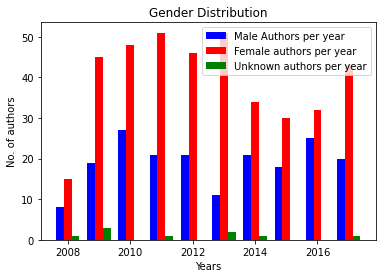

In [114]:
import matplotlib.pyplot as plt
plt.bar(years-0.25, males_by_yr, width = 0.25, color = 'b', label="Male Authors per year")
plt.bar(years, females_by_yr, width = 0.25, color = 'r', label="Female authors per year")
plt.bar(years+0.25, unknown_by_yr, width = 0.25, color = 'g', label="Unknown authors per year")
plt.title('Gender Distribution')
plt.ylabel('No. of authors')
plt.xlabel('Years')
plt.legend()
plt.show()